# PCA Analysis of Student Performance Data

## Introduction
This notebook documents the Dimensionality Reduction process applied in the Visual Analytics project. 
We use **Principal Component Analysis (PCA)** to project the high-dimensional student data (33 attributes) into a 2D space for visualization.

The goal is to simplify the complexity of the dataset while retaining the most significant patterns, allowing us to identify clusters of students with similar characteristics.

### Step 1: Load Libraries and Data
We use `pandas` for data manipulation and `scikit-learn` for the PCA algorithm. We load the cleaned dataset.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load Data
df = pd.read_csv('student-mat.csv', sep=';') # Note: Check separator!
print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Step 2: Data Preprocessing
PCA only works with numerical data. We need to:
1. Select numerical columns.
2. Encode categorical columns if necessary (or drop them for this specific analysis).
3. **Standardize** the data (Scale to Mean=0, Variance=1) so that variables with large ranges (like 'absences') don't dominate.

In [49]:
# Select only numeric columns for PCA
numeric_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 
                'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

data_numeric = df[numeric_cols]

# Standardization
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

### Why Standardization?
Standardization is a crucial step before PCA. PCA calculates a new projection of your dataset based on the variance of the features. 
If one feature has a variance that is orders of magnitude larger than others (e.g. `absences` ranging from 0 to 93 vs `studytime` ranging from 1 to 4), it will dominate the principal components, and the PCA will essentially just measure that one feature. 
Standardizing transforms all features to the same scale (mean=0, variance=1), allowing PCA to find correlations based on the relationships between features, not their units.

## 2. Compute PCA
We calculate the first 2 Principal Components. We choose 2 components because we want to visualize the data on a 2D plot.

In [50]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_scaled)

# Create a DataFrame for the results
pca_df = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
pca_df['G3'] = df['G3'] # Add target variable for coloring
pca_df.head()

,PC1,PC2,G3
0,-1.237779,-0.631418,6
1,-2.047520,-2.314948,6
2,-2.415952,-0.829879,10
3,2.670242,-1.195463,15
4,-0.083111,-0.994260,10


### Understanding Principal Components
The output of PCA is a new set of coordinates for each data point. 
* **PC1 (Principal Component 1):** The direction in the data with the highest variance. It captures the most significant pattern in the dataset.
* **PC2 (Principal Component 2):** The direction orthogonal (perpendicular) to PC1 with the next highest variance. It captures the second most significant pattern.

By plotting PC1 vs PC2, we are viewing the dataset from the "angle" that reveals the most information.

### Step 4: Visualize the Projection
This scatter plot shows each student as a point in the new PCA space. 
We color the points by their Final Grade (G3) to see if there is any separation between high-performing and low-performing students.

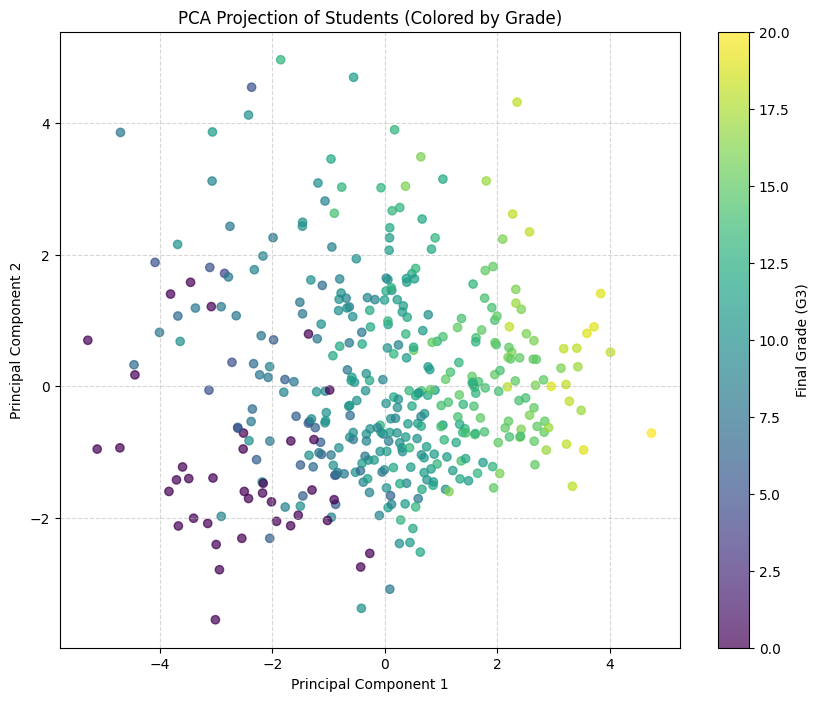

In [51]:
plt.figure(figsize=(10,8))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['G3'], cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection of Students (Colored by Grade)')
plt.colorbar(scatter, label='Final Grade (G3)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Step 5: Explained Variance
How much information (variance) is preserved in these 2 components?

Explained Variance Ratio: [0.21222531 0.13077091]
Total Variance Explained: 34.30%


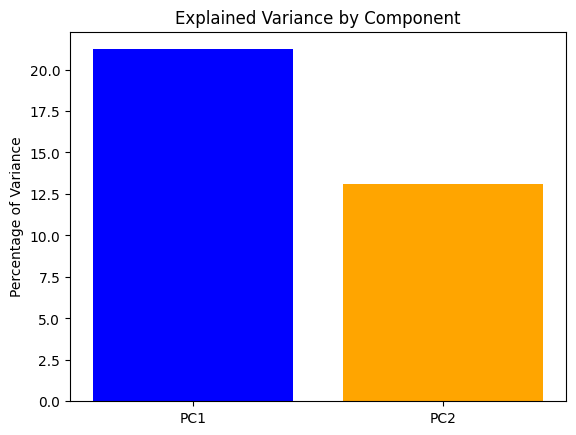

In [52]:
evr = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {evr}")
print(f"Total Variance Explained: {sum(evr) * 100:.2f}%")

plt.bar(['PC1', 'PC2'], evr * 100, color=['blue', 'orange'])
plt.ylabel('Percentage of Variance')
plt.title('Explained Variance by Component')
plt.show()

### Interpreting Explained Variance
The Explained Variance Ratio tells us how much of the original dataset's information is retained in our 2D projection. 
A total variance of around **34.30%** (21.22% + 13.08%) is typical for complex social datasets. It means that while we are simplifying 33 dimensions into 2, we are still capturing over a third of the variability that distinguishes students from one another. This justifies using these two components to find clusters or trends.

## 4. Feature Importance (Loadings)
Which original variables contribute most to PC1 and PC2? This helps interpret the axes.

In [53]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=numeric_cols)
print("Top contributors to PC1:")
print(loadings['PC1'].abs().sort_values(ascending=False).head(5))

print("\nTop contributors to PC2:")
print(loadings['PC2'].abs().sort_values(ascending=False).head(5))

Top contributors to PC1:
G2          0.467762
G3          0.452654
G1          0.451066
failures    0.317766
Medu        0.230058
Name: PC1, dtype: float64

Top contributors to PC2:
Walc         0.518704
Dalc         0.500410
goout        0.374682
freetime     0.290236
studytime    0.216797
Name: PC2, dtype: float64


### Project Conclusion: Principal Component Analysis

#### **PC1 (X-Axis): "Academic Performance"**
* **Primary Drivers:** `G2` (0.47), `G3` (0.45), `G1` (0.45).
* **Direction:**
    * **Left Side:** Lower Grades, Higher Failures.
    * **Right Side:** Higher Grades.

#### **PC2 (Y-Axis): "Social & Lifestyle"**
* **Primary Drivers:** `Walc` (Weekend Alcohol) (0.52), `Dalc` (Workday Alcohol) (0.50).
* **Secondary Driver:** `goout` (Going Out) (0.37).
* **Direction:**
    * **Higher Values:** Higher alcohol consumption and more frequent going out.
    * **Lower Values:** Lower alcohol consumption ("Sobriety").